In [1]:
import pickle

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [41]:
with open('d_rolling.pickle','rb') as read_file:
    df = pickle.load(read_file)
    
df

,Date,O/U_open,O/U_close,Season,id,total,away,home,ou1,ou2,...,ast_per_rolling_v,ast_per_opp_rolling_v,stl_per_rolling_v,stl_per_opp_rolling_v,blk_per_rolling_v,blk_per_opp_rolling_v,user_per_rolling_v,user_per_opp_rolling_v,drtg_rolling_v,drtg_opp_rolling_v
0,2007-10-30,184.0,189.5,0708,20071030SanAntonio,203.0,POR,SAS,19.0,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-10-30,214.5,212.0,0708,20071030GoldenState,213.0,UTA,GSW,-1.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-10-30,191.0,199.0,0708,20071030LALakers,188.0,HOU,LAL,-3.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-10-31,190.0,191.0,0708,20071031Toronto,203.0,PHI,TOR,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-10-31,200.0,203.5,0708,20071031Indiana,229.0,WAS,IND,29.0,25.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,2019-06-02,216.0,213.5,1819,20190602Toronto,213.0,GSW,TOR,-3.0,-0.5,...,71.84,65.06,8.58,6.78,11.38,7.94,100.0,100.0,110.58,116.52
14618,2019-06-05,214.0,209.5,1819,20190605GoldenState,232.0,TOR,GSW,18.0,22.5,...,61.52,77.52,7.70,6.42,9.08,9.68,100.0,100.0,109.72,117.08
14619,2019-06-07,216.0,215.0,1819,20190607GoldenState,197.0,TOR,GSW,-19.0,-18.0,...,59.88,75.18,7.62,6.36,10.50,8.00,100.0,100.0,110.36,116.76
14620,2019-06-10,212.0,217.0,1819,20190610Toronto,211.0,GSW,TOR,-1.0,-6.0,...,76.74,61.92,7.44,8.16,8.02,10.60,100.0,100.0,115.08,109.00


## Some More Cleaning

Let's filter out our NaN's (games 1-5 in every season for every team).

In [46]:
df = df[(df['game_num'] > 5) & (df['game_num_v'] > 5)]
df

,Date,O/U_open,O/U_close,Season,id,total,away,home,ou1,ou2,...,ast_per_rolling_v,ast_per_opp_rolling_v,stl_per_rolling_v,stl_per_opp_rolling_v,blk_per_rolling_v,blk_per_opp_rolling_v,user_per_rolling_v,user_per_opp_rolling_v,drtg_rolling_v,drtg_opp_rolling_v
77,2007-11-10,205.5,209.0,0708,20071110Orlando,202.0,PHO,ORL,-3.5,-7.0,...,60.82,48.82,9.62,7.98,4.36,9.28,100.0,100.0,98.56,108.30
86,2007-11-11,185.0,186.5,0708,20071111SanAntonio,201.0,MIL,SAS,16.0,14.5,...,55.22,60.74,6.38,7.16,9.06,9.50,100.0,100.0,102.14,100.80
87,2007-11-11,199.0,196.0,0708,20071111Seattle,210.0,DET,SEA,11.0,14.0,...,60.04,52.12,7.98,6.20,9.40,5.68,100.0,100.0,97.20,109.70
89,2007-11-12,189.0,184.5,0708,20071112NewJersey,166.0,NOH,NJN,-23.0,-18.5,...,58.20,59.82,9.36,6.96,5.22,7.52,100.0,100.0,98.46,103.76
90,2007-11-12,205.5,208.0,0708,20071112Denver,222.0,CLE,DEN,16.5,14.0,...,51.30,48.54,8.78,7.66,7.26,6.56,100.0,100.0,102.88,103.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,2019-06-02,216.0,213.5,1819,20190602Toronto,213.0,GSW,TOR,-3.0,-0.5,...,71.84,65.06,8.58,6.78,11.38,7.94,100.0,100.0,110.58,116.52
14618,2019-06-05,214.0,209.5,1819,20190605GoldenState,232.0,TOR,GSW,18.0,22.5,...,61.52,77.52,7.70,6.42,9.08,9.68,100.0,100.0,109.72,117.08
14619,2019-06-07,216.0,215.0,1819,20190607GoldenState,197.0,TOR,GSW,-19.0,-18.0,...,59.88,75.18,7.62,6.36,10.50,8.00,100.0,100.0,110.36,116.76
14620,2019-06-10,212.0,217.0,1819,20190610Toronto,211.0,GSW,TOR,-1.0,-6.0,...,76.74,61.92,7.44,8.16,8.02,10.60,100.0,100.0,115.08,109.00


Let's start with the "Four Factors". These are efficiency stats that author, Dean Oliver, identified as the most influential components to the outcome of a game, and cover 4 key areas of any basketball game: shooting (eFg), turnovers (tov), rebounding (orb), and free throws (ft_fga).

In [47]:
counter = 0
for column in df.columns:
    print(counter, '-',column)
    counter += 1

0 - Date
1 - O/U_open
2 - O/U_close
3 - Season
4 - id
5 - total
6 - away
7 - home
8 - ou1
9 - ou2
10 - Over/Under_open
11 - Over/Under_close
12 - team
13 - opp
14 - home/away
15 - pace
16 - pace_opp
17 - eFg
18 - eFg_opp
19 - tov
20 - tov_opp
21 - orb
22 - orb_opp
23 - ft_fga
24 - ft_fga_opp
25 - ortg
26 - ortg_opp
27 - fg
28 - fg_opp
29 - fga
30 - fga_opp
31 - fg_per
32 - fg_per_opp
33 - threes
34 - threes_opp
35 - threes_att
36 - threes_att_opp
37 - threes_per
38 - threes_per_opp
39 - ft
40 - ft_opp
41 - fta
42 - fta_opp
43 - ft_per
44 - ft_per_opp
45 - drb
46 - drb_opp
47 - trb
48 - trb_opp
49 - ast
50 - ast_opp
51 - stl
52 - stl_opp
53 - blk
54 - blk_opp
55 - to
56 - to_opp
57 - fouls
58 - fouls_opp
59 - ts_per
60 - ts_per_opp
61 - threes_ar
62 - threes_ar_opp
63 - ft_ar
64 - ft_ar_opp
65 - drb_per
66 - drb_per_opp
67 - trb_per
68 - trb_per_opp
69 - ast_per
70 - ast_per_opp
71 - stl_per
72 - stl_per_opp
73 - blk_per
74 - blk_per_opp
75 - user_per
76 - user_per_opp
77 - drtg
78 - dr

In [145]:
df1 = df.iloc[:,[10,11,83,84,85,86,87,88,89,90,227,228,229,230,231,232,233,234]]
df1

,Over/Under_open,Over/Under_close,eFg_rolling,eFg_opp_rolling,tov_rolling,tov_opp_rolling,orb_rolling,orb_opp_rolling,ft_fga_rolling,ft_fga_opp_rolling,eFg_rolling_v,eFg_opp_rolling_v,tov_rolling_v,tov_opp_rolling_v,orb_rolling_v,orb_opp_rolling_v,ft_fga_rolling_v,ft_fga_opp_rolling_v
77,0.0,0.0,0.5200,0.4894,12.72,12.92,22.04,26.10,0.2880,0.2514,0.5172,0.4580,11.76,15.74,21.56,31.52,0.1662,0.1582
86,1.0,1.0,0.5116,0.4624,13.04,13.50,19.82,23.30,0.2064,0.1748,0.4654,0.4760,14.22,13.98,29.22,25.42,0.1892,0.2544
87,1.0,1.0,0.4858,0.4940,17.42,14.54,26.10,27.80,0.1878,0.2546,0.5104,0.4502,12.80,14.42,27.00,23.82,0.2466,0.2468
89,0.0,0.0,0.4468,0.4780,16.10,13.92,22.84,22.86,0.2802,0.2946,0.4768,0.4610,12.06,13.08,24.88,24.70,0.1830,0.1598
90,1.0,1.0,0.5046,0.5182,16.16,16.60,22.76,28.54,0.2424,0.2022,0.4838,0.4598,13.52,13.12,29.46,20.52,0.1776,0.3258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,0.0,0.0,0.5324,0.4954,9.88,12.56,18.28,21.68,0.2694,0.2498,0.5484,0.5136,13.42,12.10,26.20,21.24,0.2394,0.2360
14618,1.0,1.0,0.5368,0.5190,13.58,11.02,23.96,20.32,0.2524,0.2200,0.5236,0.5158,9.78,12.44,21.40,20.34,0.2772,0.2554
14619,0.0,0.0,0.5158,0.5352,13.02,11.24,23.22,19.20,0.2562,0.2292,0.5388,0.5020,10.44,12.48,19.78,22.34,0.2708,0.2678
14620,0.0,0.0,0.5390,0.4996,10.98,13.60,19.56,22.62,0.2646,0.2726,0.5086,0.5376,13.86,10.94,23.54,18.78,0.2444,0.2356


Before we can do any data exploration, we need to split our dataset between training/validating & testing. This way we can avoid biasing our decision making on model development based off our testing data to more accurately guage how our model does on "fresh" data.

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
#EXPLORING FOUR FACTORS FILTERED DF
df_train, df_test = train_test_split(df1,
                                     test_size=0.2, 
                                     random_state=42)

In [148]:
df_train

,Over/Under_open,Over/Under_close,eFg_rolling,eFg_opp_rolling,tov_rolling,tov_opp_rolling,orb_rolling,orb_opp_rolling,ft_fga_rolling,ft_fga_opp_rolling,eFg_rolling_v,eFg_opp_rolling_v,tov_rolling_v,tov_opp_rolling_v,orb_rolling_v,orb_opp_rolling_v,ft_fga_rolling_v,ft_fga_opp_rolling_v
4548,0.0,0.0,0.4710,0.5340,10.66,13.12,22.12,28.20,0.2496,0.3122,0.5190,0.5074,11.76,11.02,25.44,23.22,0.1780,0.2310
8364,1.0,1.0,0.4912,0.5690,15.06,12.36,30.82,22.42,0.2238,0.2106,0.4870,0.5440,11.34,15.82,24.08,29.60,0.1794,0.2580
10889,1.0,1.0,0.4898,0.4880,14.90,13.14,20.92,22.22,0.2028,0.1908,0.5052,0.5002,13.76,14.38,29.92,24.36,0.2534,0.2302
4534,0.0,0.0,0.5218,0.5246,14.24,13.44,26.62,29.72,0.2472,0.2516,0.4864,0.4836,10.38,12.72,24.92,26.72,0.2496,0.2458
11519,0.0,0.0,0.5318,0.5254,9.92,11.52,19.22,21.46,0.2590,0.2070,0.4866,0.5094,14.24,9.06,22.38,27.08,0.1628,0.2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,0.0,0.0,0.5112,0.4866,11.32,15.44,29.80,29.34,0.1888,0.2102,0.4982,0.4772,15.80,11.90,22.90,27.00,0.2468,0.2242
14523,1.0,1.0,0.4970,0.5682,8.98,13.10,24.00,23.42,0.1688,0.1730,0.5290,0.5126,11.90,11.52,19.08,21.24,0.1772,0.1954
5853,0.0,0.0,0.5020,0.4924,12.80,8.74,35.42,24.84,0.2480,0.1602,0.5344,0.4844,15.44,10.12,28.46,28.28,0.2258,0.1394
953,0.0,0.0,0.5124,0.5342,12.46,10.58,23.36,26.82,0.1438,0.2480,0.5410,0.4860,12.92,9.54,26.32,19.78,0.3078,0.2458


In [149]:
df_train.describe()

,Over/Under_open,Over/Under_close,eFg_rolling,eFg_opp_rolling,tov_rolling,tov_opp_rolling,orb_rolling,orb_opp_rolling,ft_fga_rolling,ft_fga_opp_rolling,eFg_rolling_v,eFg_opp_rolling_v,tov_rolling_v,tov_opp_rolling_v,orb_rolling_v,orb_opp_rolling_v,ft_fga_rolling_v,ft_fga_opp_rolling_v
count,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000,10813.000000
mean,0.496717,0.496070,0.505336,0.504532,12.660640,12.656251,24.926542,24.979003,0.217970,0.217842,0.505675,0.503900,12.631303,12.668826,25.031695,24.922497,0.217728,0.217096
std,0.500012,0.500008,0.035233,0.033925,1.764226,1.808328,4.361173,4.028045,0.044663,0.042803,0.035392,0.033962,1.762956,1.845521,4.402477,3.943722,0.044481,0.043004
min,0.000000,0.000000,0.388200,0.370000,6.760000,6.000000,10.860000,10.000000,0.083200,0.099400,0.371200,0.377200,6.080000,6.540000,9.940000,12.180000,0.082800,0.093600
25%,0.000000,0.000000,0.481400,0.481400,11.440000,11.400000,21.920000,22.240000,0.187000,0.187600,0.481400,0.481000,11.420000,11.420000,22.000000,22.220000,0.186200,0.186800
50%,0.000000,0.000000,0.504800,0.504400,12.640000,12.600000,24.780000,24.940000,0.214600,0.214600,0.505400,0.503400,12.600000,12.600000,24.980000,24.860000,0.214600,0.214400
75%,1.000000,1.000000,0.528800,0.527600,13.840000,13.860000,27.780000,27.640000,0.246000,0.244600,0.529200,0.526200,13.800000,13.900000,27.980000,27.540000,0.245800,0.244600
max,1.000000,1.000000,0.627400,0.625400,20.280000,21.080000,43.680000,43.860000,0.418800,0.432600,0.646200,0.636800,19.280000,20.240000,41.500000,39.480000,0.430000,0.416800


As we can see, 2 of the Four Factors are in decimal form, and the other 2 are in percentage form. Let's standardize this with the StandardScalar package.

## Simple Logistic Regression

Now that we've scaled our data let's see how it fits in a Logistic Regression model.

In [335]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [336]:
scalar = StandardScaler()

In [337]:
X_train = scalar.fit_transform(df_train.iloc[:,2:])
y_train = df_train['Over/Under_close']

In [340]:
logm = LogisticRegression()

In [341]:
logm.fit(X_train, y_train)

LogisticRegression()

In [342]:
cross_val_score(logm, X_train, y_train, cv=5)

array([0.52149792, 0.50300509, 0.50439205, 0.4893617 , 0.49907493])

In [344]:
print('intercept: ', round(logm.intercept_[0], 4))
print('over coef: ', round(logm.coef_[0][0], 4))

intercept:  -0.0158
over coef:  0.0033


Our coefficient is essentially 0, which suggests this model doesn't work well with our data, but let's see how our predictions match up with reality.

In [345]:
df_eval = df_test.copy()
df_eval['pred'] = logm.predict(df_test.iloc[:,2:])
df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['Over/Under_close']
df_eval['proba_over'] = logm.predict_proba(df_eval.iloc[:,2:18])[:, 1]

In [346]:
over_proba = logm.predict_proba(df_test.iloc[:,2:])
over_proba[:5]

array([[0.50553911, 0.49446089],
       [0.48888147, 0.51111853],
       [0.47408454, 0.52591546],
       [0.4346059 , 0.5653941 ],
       [0.48289707, 0.51710293]])

The first column represents the probability of y=0, or our target variable being 0, which in our context means the probability that the game is an Under, and the second column being the probability a game is classified as an Over. The first five entries of our test set are mixed, which is a good first sign. Let's investigate some metrics to get some more insight into how our classification is working.

In [285]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score

In [356]:
logm_confusion = confusion_matrix(df_eval['Over/Under_close'], df_eval['pred'])
logm_confusion

array([[ 239, 1138],
       [ 234, 1093]])

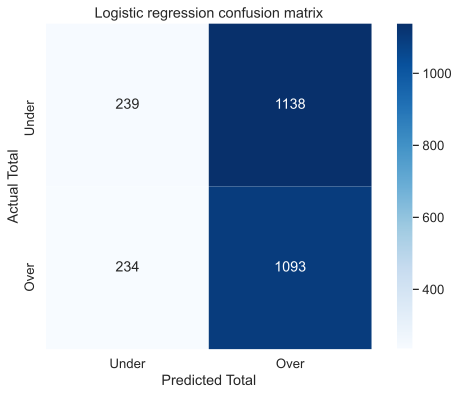

In [358]:
# Confusion matrix for logistic regression
plt.figure(dpi=150)
sns.heatmap(logm_confusion, cmap=plt.cm.Blues, annot=True, fmt='.4g', square=True,
           xticklabels=['Under','Over'],
           yticklabels=['Under','Over'])

plt.xlabel('Predicted Total')
plt.ylabel('Actual Total')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logm_four_factors")

Looking at this confusion matrix we can see that it classified most of our games as Overs, which could mean several things: our data didn't have enough separability to determine a valuable threshold line, our features aren't indcative of the total, or are dataset isn't representative of the population. We'll have to probably use a different model to better predict our classification.

In [348]:
precision_score(df_eval['Over/Under_close'], df_eval['pred'])

0.4899148363962349

In [349]:
recall_score(df_eval['Over/Under_close'], df_eval['pred'])

0.8236623963828184

This pair of precision and recall scores shows that our model predicts our classification correctly a little less than half of the time, but it captures 4 out of 5 of our Overs. We should get an ok f1 score from this kind of situation, where one of our classifications is being captured well, but not the majority of the dataset.

In [350]:
f1_score(df_eval['Over/Under_close'], df_eval['pred'])

0.6143901068015739

In [351]:
fpr, tpr, thresholds = roc_curve(df_eval['Over/Under_close'],
                                 df_eval['proba_over'])

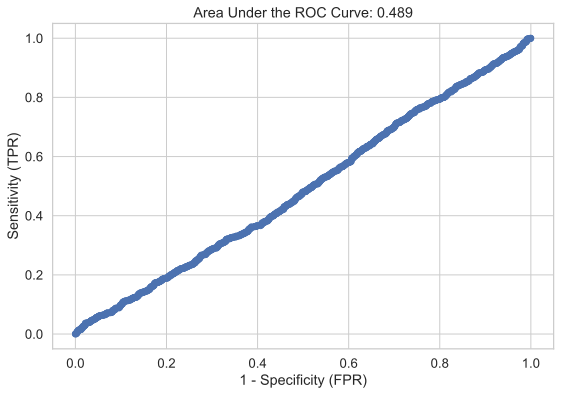

In [291]:
plot_roc(df_eval['Over/Under_close'], df_eval['proba_over'])

Seeing our AUC under 0.5 means our model isn't doing better than just guessing an over/under for every game. We will need to incorporate new features to see if we can improve this.

## K-Nearest Neighbors

In [164]:
from sklearn.neighbors import KNeighborsRegressor

In [165]:
knn = KNeighborsRegressor(n_neighbors=5)

In [166]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [167]:
df_eval = df_test.copy()
df_eval['pred'] = knn.predict(df_test.iloc[:,2:])
df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['Over/Under_close']

In [355]:
knn.predict(df_test.iloc[:,2:]).astype('category')

TypeError: data type 'category' not understood

In [352]:
confusion_matrix(df_eval['Over/Under_close'], knn.predict(df_test.iloc[:,2:]))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Decision Tree Classifier

In [360]:
from sklearn.tree import DecisionTreeClassifier

In [361]:
tree_clf = DecisionTreeClassifier(max_depth = 11)

In [387]:
#don't need to scale for decision trees
X_train = df_train.iloc[:,2:]
y_train = df_train['Over/Under_close']

In [388]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [389]:
cross_val_score(tree_clf, X_train, y_train, cv=5)

array([0.50069348, 0.48682386, 0.50624133, 0.48982424, 0.49213691])

In [364]:
df_eval = df_test.copy()
df_eval['pred'] = tree_clf.predict(df_test.iloc[:,2:])
df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['Over/Under_close']
df_eval['proba_over'] = tree_clf.predict_proba(df_eval.iloc[:,2:18])[:, 1]

In [365]:
over_proba = tree_clf.predict_proba(df_test.iloc[:,2:])
over_proba[:5]

array([[0.52847471, 0.47152529],
       [0.54098361, 0.45901639],
       [0.49470339, 0.50529661],
       [0.71875   , 0.28125   ],
       [0.49470339, 0.50529661]])

In [366]:
dt_confusion = confusion_matrix(df_eval['Over/Under_close'], df_eval['pred'])
dt_confusion

array([[742, 635],
       [736, 591]])

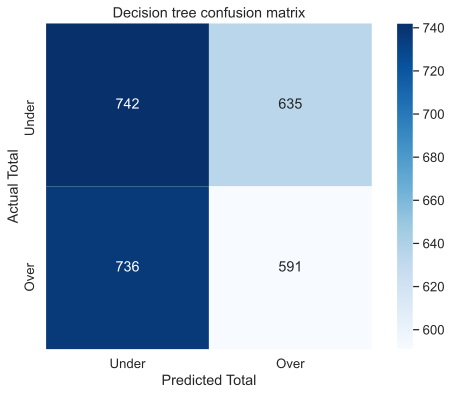

In [367]:
# Confusion matrix for logistic regression
plt.figure(dpi=150)
sns.heatmap(dt_confusion, cmap=plt.cm.Blues, annot=True, fmt='.4g', square=True,
           xticklabels=['Under','Over'],
           yticklabels=['Under','Over'])

plt.xlabel('Predicted Total')
plt.ylabel('Actual Total')
plt.title('Decision tree confusion matrix');

plt.savefig("confusion_matrix_dt_four_factors")

In [368]:
precision_score(df_eval['Over/Under_close'], df_eval['pred'])

0.4820554649265905

In [369]:
recall_score(df_eval['Over/Under_close'], df_eval['pred'])

0.4453654860587792

In [370]:
f1_score(df_eval['Over/Under_close'], df_eval['pred'])

0.462984723854289

These factors point to a model that works less well than our Logistic one. Capturing under half of the overs, and misclassifying half of them too. I would expect an ROC curve to be right around the guess line. Let's find out.

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score

In [263]:
fpr, tpr, thresholds = roc_curve(df_eval['Over/Under_close'],
                                 df_eval['proba_over'])

In [264]:
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");

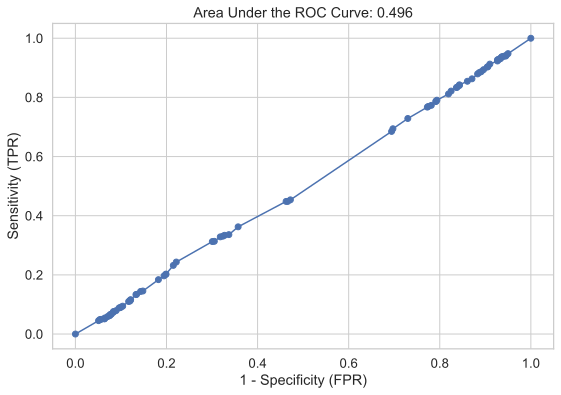

In [265]:
plot_roc(df_eval['Over/Under_close'], df_eval['proba_over'])

This curve confirms our suspicion that this model wouldn't fair much better than a guess. Let's see if we can find a model that fairs better.

## Random Forests

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
rf_clf = RandomForestClassifier(random_state=42)

In [390]:
#don't need to scale for decision trees
X_train = df_train.iloc[:,2:]
y_train = df_train['Over/Under_close']

In [391]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [392]:
cross_val_score(rf_clf, X_train, y_train, cv=5)

array([0.50670365, 0.49838188, 0.48867314, 0.51526364, 0.50508788])

In [375]:
df_eval = df_test.copy()
df_eval['pred'] = rf_clf.predict(df_test.iloc[:,2:])
df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['Over/Under_close']
df_eval['proba_over'] = rf_clf.predict_proba(df_eval.iloc[:,2:18])[:, 1]

In [384]:
over_proba = rf_clf.predict_proba(df_test.iloc[:,2:])
over_proba[:10]

array([[0.44, 0.56],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.47, 0.53],
       [0.55, 0.45],
       [0.47, 0.53],
       [0.52, 0.48],
       [0.59, 0.41],
       [0.45, 0.55],
       [0.43, 0.57]])

In [377]:
rf_confusion = confusion_matrix(df_eval['Over/Under_close'], df_eval['pred'])
rf_confusion

array([[738, 639],
       [700, 627]])

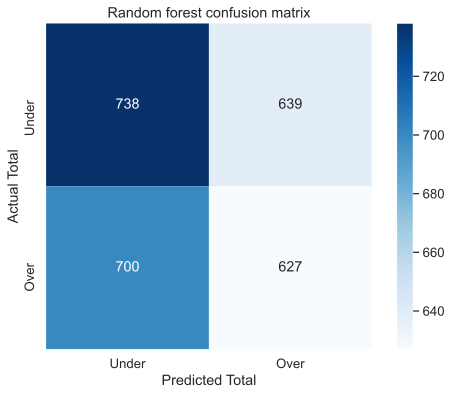

In [381]:
# Confusion matrix for random forest
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, fmt='.4g', square=True,
           xticklabels=['Under','Over'],
           yticklabels=['Under','Over'])

plt.xlabel('Predicted Total')
plt.ylabel('Actual Total')
plt.title('Random forest confusion matrix');

plt.savefig("confusion_matrix_rf_four_factors")

In [378]:
precision_score(df_eval['Over/Under_close'], df_eval['pred'])

0.495260663507109

In [379]:
recall_score(df_eval['Over/Under_close'], df_eval['pred'])

0.4724943481537302

In [380]:
f1_score(df_eval['Over/Under_close'], df_eval['pred'])

0.4836097184728114

In [302]:
fpr, tpr, thresholds = roc_curve(df_eval['Over/Under_close'],
                                 df_eval['proba_over'])

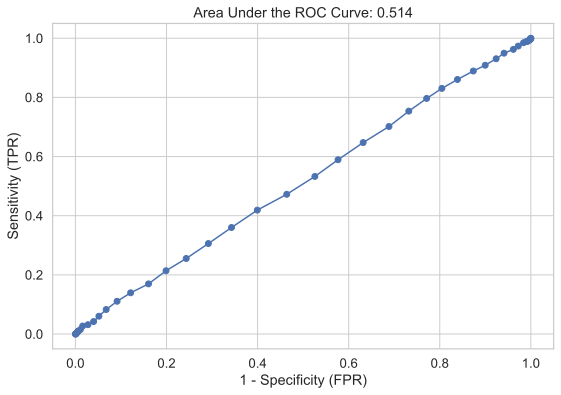

In [303]:
plot_roc(df_eval['Over/Under_close'], df_eval['proba_over'])

This is a slight improvement on our decision tree and logisitic model. We are at least better than a guess if only just barely. Let's see how our final candidate performs.

## XGBoost

In [305]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [314]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [313]:
#Circle back to implement cross-validation
'''
cv = KFold(n_splits=10,random_state=42,shuffle=True)
for train_ind, val_ind in cv.split(X_train,y_train):
    
    X_train, y_train = X_train[train_ind], y_train[train_ind]
    X_val, y_val = X_train[val_ind], y_train[val_ind] 
'''

'\ncv = KFold(n_splits=10,random_state=42,shuffle=True)\nfor train_ind, val_ind in cv.split(X_train,y_train):\n    \n    X_train, y_train = X_train[train_ind], y_train[train_ind]\n    X_val, y_val = X_train[val_ind], y_train[val_ind] \n'

In [315]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective='binary:logistic',
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

In [318]:
eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric=None,
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[08:08:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69231	validation_1-logloss:0.69294
[1]	validation_0-logloss:0.69171	validation_1-logloss:0.69303
[2]	validation_0-logloss:0.69099	validation_1-logloss:0.69299
[3]	validation_0-logloss:0.69048	validation_1-logloss:0.69291
[4]	validation_0-logloss:0.68994	validation_1-logloss:0.69287
[5]	validation_0-logloss:0.68947	validation_1-logloss:0.69279
[6]	validation_0-logloss:0.68894	validation_1-logloss:0.69273
[7]	validation_0-logloss:0.68827	validation_1-logloss:0.69277
[8]	validation_0-logloss:0.68768	validation_1-logloss:0.69269
[9]	validation_0-logloss:0.68725	validation_1-logloss:0.69277
[10]	validation_0-logloss:0.68670	validation_1-logloss:0.69267
[11]	v

In [320]:
X_val['pred'] = gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)

<ipython-input-320-6ef185fb8e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['pred'] = gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)


In [385]:
gbm.best_ntree_limit

23

In [324]:
y_val

13017    0.0
11656    1.0
1488     0.0
5062     0.0
14383    0.0
        ... 
939      0.0
12647    0.0
12551    0.0
5234     1.0
1141     0.0
Name: Over/Under_close, Length: 2704, dtype: float64

In [382]:
xgb_confusion = confusion_matrix(y_val, X_val['pred'])
xgb_confusion

array([[855, 484],
       [824, 541]])

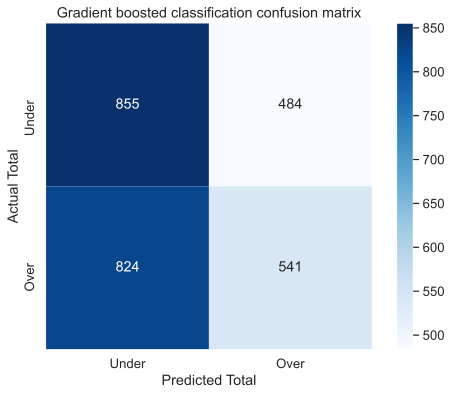

In [383]:
# Confusion matrix for gradient boosted classification
plt.figure(dpi=150)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, fmt='.4g', square=True,
           xticklabels=['Under','Over'],
           yticklabels=['Under','Over'])

plt.xlabel('Predicted Total')
plt.ylabel('Actual Total')
plt.title('Gradient boosted classification confusion matrix');

plt.savefig("confusion_matrix_xgb_four_factors")

In [326]:
precision_score(y_val, X_val['pred'])

0.5278048780487805

In [327]:
recall_score(y_val, X_val['pred'])

0.3963369963369963

In [328]:
f1_score(y_val, X_val['pred'])

0.45271966527196655

In [329]:
fpr, tpr, thresholds = roc_curve(y_val,X_val['pred'])

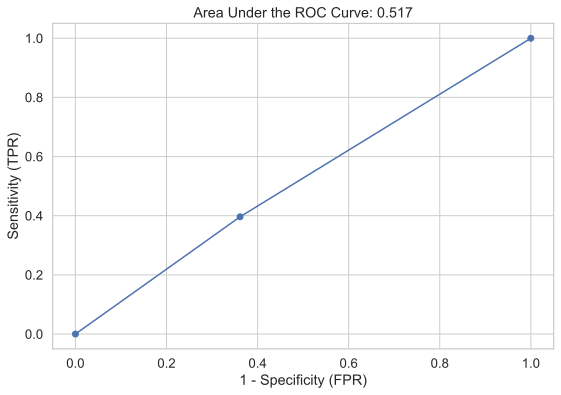

In [331]:
plot_roc(y_val,X_val['pred'])

Another improvement, still barely better than a guess. Let's see if we can tune some hyperparameters

In [333]:
cross_val_score(gbm, X_train, y_train, cv=5)

/Users/jseemayer/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jseemayer/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jseemayer/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jseemayer/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jseemayer/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.49653259, 0.51918632, 0.48682386, 0.50601295, 0.49537465])

In [334]:
a = [0.49653259, 0.51918632, 0.48682386, 0.50601295, 0.49537465]
np.mean(a)

0.500786074

Using cross-validation, we are seeing that our model is just hovering around a guess. This checks with our confusion matrix.

All of these models have performed pretty poorly. From AUC ROC curves to confusion matrixes to precision/recall scores, we would like to see our dataset better classified overall. Having ensembled and stand alone modeling methods leading to similar benchmark metrics would lead us to believe that perhaps the features themselves are not telling enough. Let's see if we can engineer some features to lead to better classification.

## Feature Engineering and EDA

So far all of our features were "Four Factor", 5-game rolling averages. These statistics were believed to be informative because they have been studied to show a correlation between wins and losses, perhaps it does not extend to our intended use case: over/under. Maybe rolling averages (how you have recently performed) also aren't too informative to an over/under classification. Let's compare how one team is performing to how the other team's opponents have and see if we can get any insights in our data. The logic here is: 

## Scratch Work

In [40]:
precisions, recalls, thresholds = precision_recall_curve(df_eval['Over/Under_close'],over_proba)

ValueError: y should be a 1d array, got an array of shape (5489, 2) instead.

In [ ]:
#Pair plots to find some feature where we have some seperation. Starting with Four Factors...
sns.pairplot(df_train.iloc[:,[1,2,3]], corner=True, height=1.5, plot_kws={'size': 3}, hue='Over/Under_close');

In [ ]:
sns.pairplot(df_train.iloc[:,[1,4,5]], corner=True, height=1.5, plot_kws={'size': 3}, hue='Over/Under_close');